# Project -  Data Preparation I

This is the second part of the AC data mining project. In this notebook, you will find the proccess of data preparation consisting in merging some of the tables, access data quality, outlier treatment and feature engineering.

## Import of the needed packages

In [4]:
import pandas as pd #manipulação de dados
import matplotlib.pyplot as plt #plotagem de gráficos   
import seaborn as sns #plotagem de gráficos mais bonitos e com mais recursos que o matplotlib 



In [27]:
#Carregando os valores do dataset
base = pd.read_csv('quinto_andar_transformed_data.csv')
basecpy= pd.read_csv('quinto_andar_transformed_data.csv')

#Mostrando as 5 primeiras linhas do dataset
base.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              2775 non-null   object 
 1   bairro           2775 non-null   object 
 2   aluguel          2775 non-null   float64
 3   condominio       2768 non-null   float64
 4   iptu             2767 non-null   float64
 5   seguro_incendio  2775 non-null   float64
 6   taxa_serviço     2775 non-null   float64
 7   total            2775 non-null   float64
 8   metragem         2775 non-null   float64
 9   quarto           2775 non-null   float64
 10  banheiro         2775 non-null   float64
 11  vaga_carro       2775 non-null   float64
 12  andar            2775 non-null   float64
 13  aceita_pet       2775 non-null   float64
 14  mobilia          2775 non-null   float64
 15  metro_prox       2775 non-null   float64
dtypes: float64(14), object(2)
memory usage: 347.0+ KB


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>url</th>
      <th>bairro</th>
      <th>aluguel</th>
      <th>condominio</th>
      <th>iptu</th>
      <th>seguro_incendio</th>
      <th>taxa_serviço</th>
      <th>total</th>
      <th>metragem</th>
      <th>quarto</th>
      <th>banheiro</th>
      <th>vaga_carro</th>
      <th>andar</th>
      <th>aceita_pet</th>
      <th>mobilia</th>
      <th>metro_prox</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>https://www.quintoandar.com.br/imovel/89332996...</td>
      <td>Liberdade</td>
      <td>1900.0</td>
      <td>424.0</td>
      <td>5.0</td>
      <td>25.0</td>
      <td>38.0</td>
      <td>2392.0</td>
      <td>57.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>18.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>https://www.quintoandar.com.br/imovel/89334069...</td>
      <td>Santa Cecília</td>
      <td>1190.0</td>
      <td>460.0</td>
      <td>0.0</td>
      <td>16.0</td>
      <td>23.0</td>
      <td>1689.0</td>
      <td>56.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>11.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>https://www.quintoandar.com.br/imovel/89333859...</td>
      <td>Aclimação</td>
      <td>2330.0</td>
      <td>450.0</td>
      <td>5.0</td>
      <td>30.0</td>
      <td>46.0</td>
      <td>2861.0</td>
      <td>48.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>10.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>https://www.quintoandar.com.br/imovel/89337065...</td>
      <td>Liberdade</td>
      <td>1850.0</td>
      <td>418.0</td>
      <td>6.0</td>
      <td>24.0</td>
      <td>37.0</td>
      <td>2335.0</td>
      <td>44.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>3.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>https://www.quintoandar.com.br/imovel/89337700...</td>
      <td>Vila Guilherme</td>
      <td>2200.0</td>
      <td>392.0</td>
      <td>10.0</td>
      <td>28.0</td>
      <td>44.0</td>
      <td>2674.0</td>
      <td>62.0</td>
      <td>2.0</td>
      <td>2.0</td>
      <td>1.0</td>
      <td>8.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
  </tbody>
</table>
</div>

In [28]:
#Verificando as informações do dataset
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              2775 non-null   object 
 1   bairro           2775 non-null   object 
 2   aluguel          2775 non-null   float64
 3   condominio       2768 non-null   float64
 4   iptu             2767 non-null   float64
 5   seguro_incendio  2775 non-null   float64
 6   taxa_serviço     2775 non-null   float64
 7   total            2775 non-null   float64
 8   metragem         2775 non-null   float64
 9   quarto           2775 non-null   float64
 10  banheiro         2775 non-null   float64
 11  vaga_carro       2775 non-null   float64
 12  andar            2775 non-null   float64
 13  aceita_pet       2775 non-null   float64
 14  mobilia          2775 non-null   float64
 15  metro_prox       2775 non-null   float64
dtypes: float64(14), object(2)
memory usage: 347.0+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              2775 non-null   object 
 1   bairro           2775 non-null   object 
 2   aluguel          2775 non-null   float64
 3   condominio       2768 non-null   float64
 4   iptu             2767 non-null   float64
 5   seguro_incendio  2775 non-null   float64
 6   taxa_serviço     2775 non-null   float64
 7   total            2775 non-null   float64
 8   metragem         2775 non-null   float64
 9   quarto           2775 non-null   float64
 10  banheiro         2775 non-null   float64
 11  vaga_carro       2775 non-null   float64
 12  andar            2775 non-null   float64
 13  aceita_pet       2775 non-null   float64
 14  mobilia          2775 non-null   float64
 15  metro_prox       2775 non-null   float64
dtypes: float64(14), object(2)
memory usage: 347.0+ KB


É possivel verificar que temos 16 colunas e 2775 linhas no total. Porém, nas colunas condominio e iptu temos menos linhas. Vamos verificar o que se passa 

In [29]:
#Verificando a quantidade de valores nulos  por coluna
base.isnull().sum()

url                0
bairro             0
aluguel            0
condominio         7
iptu               8
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

É possível verificar que na coluna condominio e iptu temos 7 e 8 valores nulos respectivamente

url                0
bairro             0
aluguel            0
condominio         7
iptu               8
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

In [33]:
base.url[13]





'https://www.quintoandar.com.br/imovel/893377120?house_tags=newAd&search_rank=%7B%22sortMode%22%3A%22relevance%22%2C%22searchMode%22%3A%22list%22%2C%22resultsOrigin%22%3A%22search%22%2C%22rank%22%3A553%2C%22personalization%22%3Atrue%7D&search_id=%224bf69054f19a11eb87180a0adc3b16b0%22&from_route=%22search_results%22'

Entendemos que valores como condómino nulo são registros de casas que realmente não possuem condomínio .                           
Uma casa, especialmente se for uma casa independente e não parte de um condomínio fechado ou comunidade planejada geralmente não paga taxa de condomínio. 

Assim, podemos substituir por 0 esses valores NaN

In [34]:
#filtrando os valores nulos da coluna condominio    

base[base['condominio'].isnull()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
987,https://www.quintoandar.com.br/imovel/89288689...,Bela Vista,2960.0,NaN,125.0,49.0,59.0,3193.0,100.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
1391,https://www.quintoandar.com.br/imovel/89310205...,Perdizes,5200.0,NaN,1030.0,86.0,104.0,6420.0,220.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0
1527,https://www.quintoandar.com.br/imovel/89310896...,Aclimação,3000.0,NaN,158.0,50.0,60.0,3268.0,90.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0
1801,https://www.quintoandar.com.br/imovel/89284189...,Ipiranga,2600.0,NaN,100.0,43.0,52.0,2795.0,100.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
2287,https://www.quintoandar.com.br/imovel/89288795...,Ipiranga,1000.0,NaN,80.0,17.0,20.0,1117.0,25.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0
2387,https://www.quintoandar.com.br/imovel/89288796...,Ipiranga,1375.0,NaN,100.0,23.0,27.0,1525.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2751,https://www.quintoandar.com.br/imovel/89288796...,Ipiranga,1375.0,NaN,100.0,23.0,27.0,1525.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


Valores nulos da coluna condominio  
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>url</th>
      <th>bairro</th>
      <th>aluguel</th>
      <th>condominio</th>
      <th>iptu</th>
      <th>seguro_incendio</th>
      <th>taxa_serviço</th>
      <th>total</th>
      <th>metragem</th>
      <th>quarto</th>
      <th>banheiro</th>
      <th>vaga_carro</th>
      <th>andar</th>
      <th>aceita_pet</th>
      <th>mobilia</th>
      <th>metro_prox</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>987</th>
      <td>https://www.quintoandar.com.br/imovel/89288689...</td>
      <td>Bela Vista</td>
      <td>2960.0</td>
      <td>NaN</td>
      <td>125.0</td>
      <td>49.0</td>
      <td>59.0</td>
      <td>3193.0</td>
      <td>100.0</td>
      <td>2.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>1391</th>
      <td>https://www.quintoandar.com.br/imovel/89310205...</td>
      <td>Perdizes</td>
      <td>5200.0</td>
      <td>NaN</td>
      <td>1030.0</td>
      <td>86.0</td>
      <td>104.0</td>
      <td>6420.0</td>
      <td>220.0</td>
      <td>3.0</td>
      <td>3.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>1527</th>
      <td>https://www.quintoandar.com.br/imovel/89310896...</td>
      <td>Aclimação</td>
      <td>3000.0</td>
      <td>NaN</td>
      <td>158.0</td>
      <td>50.0</td>
      <td>60.0</td>
      <td>3268.0</td>
      <td>90.0</td>
      <td>3.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>1801</th>
      <td>https://www.quintoandar.com.br/imovel/89284189...</td>
      <td>Ipiranga</td>
      <td>2600.0</td>
      <td>NaN</td>
      <td>100.0</td>
      <td>43.0</td>
      <td>52.0</td>
      <td>2795.0</td>
      <td>100.0</td>
      <td>2.0</td>
      <td>2.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2287</th>
      <td>https://www.quintoandar.com.br/imovel/89288795...</td>
      <td>Ipiranga</td>
      <td>1000.0</td>
      <td>NaN</td>
      <td>80.0</td>
      <td>17.0</td>
      <td>20.0</td>
      <td>1117.0</td>
      <td>25.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>2.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2387</th>
      <td>https://www.quintoandar.com.br/imovel/89288796...</td>
      <td>Ipiranga</td>
      <td>1375.0</td>
      <td>NaN</td>
      <td>100.0</td>
      <td>23.0</td>
      <td>27.0</td>
      <td>1525.0</td>
      <td>50.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2751</th>
      <td>https://www.quintoandar.com.br/imovel/89288796...</td>
      <td>Ipiranga</td>
      <td>1375.0</td>
      <td>NaN</td>
      <td>100.0</td>
      <td>23.0</td>
      <td>27.0</td>
      <td>1525.0</td>
      <td>50.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
  </tbody>
</table>
</div>


In [41]:
#filtrando apenas os valores nulos da coluna condominio 

#base[base['condominio'].isnull()]['condominio']
base.loc[base['condominio'].isnull(), 'condominio']


987    NaN
1391   NaN
1527   NaN
1801   NaN
2287   NaN
2387   NaN
2751   NaN
Name: condominio, dtype: float64

<p>987    NaN </p>
<p>1391   NaN </p>
<p>1527   NaN </p>
<p>1801   NaN </p>
<p>2287   NaN </p>
<p>2387   NaN </p>
<p>2751   NaN </p>
Name: condominio, dtype: float64


In [45]:
#Atribuindo o valor 0 para os valores nulos da coluna condominio
base.loc[base['condominio'].isnull(), 'condominio'] = 0

#Verificando se ainda existem valores nulos na coluna condominio
base.condominio.isnull().sum() 

0

Já não temos nenhum valor nulo (NaN) na coluna Condomínio

###### Repetir o mesmo processo na coluna iptu

In [47]:
#Verificando os valores nulos na coluna iptu
base[base.iptu.isnull()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
321,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
580,https://www.quintoandar.com.br/imovel/89276781...,Aclimação,1500.0,477.0,NaN,20.0,30.0,2027.0,67.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0
732,https://www.quintoandar.com.br/imovel/89277791...,Vila Olímpia,3700.0,0.0,NaN,47.0,74.0,3821.0,60.0,1.0,1.0,1.0,15.0,0.0,0.0,0.0
1348,https://www.quintoandar.com.br/imovel/89277231...,Consolação,2696.0,1033.0,NaN,35.0,53.0,3882.0,88.0,3.0,2.0,1.0,4.0,1.0,1.0,1.0
1486,https://www.quintoandar.com.br/imovel/89279154...,Jardim Paulista,6750.0,1400.0,NaN,86.0,135.0,8371.0,90.0,1.0,2.0,2.0,4.0,0.0,1.0,1.0
1709,https://www.quintoandar.com.br/imovel/89281155...,Aclimação,3000.0,1100.0,NaN,39.0,60.0,4199.0,100.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0
2209,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
2659,https://www.quintoandar.com.br/imovel/89279454...,Bela Vista,906.0,267.0,NaN,12.0,18.0,1203.0,27.0,1.0,1.0,0.0,14.0,0.0,0.0,1.0


O IPTU, sigla para Imposto sobre a Propriedade Predial e Territorial Urbana, é um imposto brasileiro cobrado pelos municípios sobre a propriedade de imóveis urbanos.

In [49]:
#Acessando url onde os valores da coluna iptu são nulos
base.url[base.iptu.isnull()]

321     https://www.quintoandar.com.br/imovel/89278332...
580     https://www.quintoandar.com.br/imovel/89276781...
732     https://www.quintoandar.com.br/imovel/89277791...
1348    https://www.quintoandar.com.br/imovel/89277231...
1486    https://www.quintoandar.com.br/imovel/89279154...
1709    https://www.quintoandar.com.br/imovel/89281155...
2209    https://www.quintoandar.com.br/imovel/89278332...
2659    https://www.quintoandar.com.br/imovel/89279454...
Name: url, dtype: object

In [50]:
#Podemos excluir as linhas onde os valores da coluna iptu são nulos
base.dropna(subset=['iptu'], inplace=True)

base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2767 entries, 0 to 2774
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              2767 non-null   object 
 1   bairro           2767 non-null   object 
 2   aluguel          2767 non-null   float64
 3   condominio       2767 non-null   float64
 4   iptu             2767 non-null   float64
 5   seguro_incendio  2767 non-null   float64
 6   taxa_serviço     2767 non-null   float64
 7   total            2767 non-null   float64
 8   metragem         2767 non-null   float64
 9   quarto           2767 non-null   float64
 10  banheiro         2767 non-null   float64
 11  vaga_carro       2767 non-null   float64
 12  andar            2767 non-null   float64
 13  aceita_pet       2767 non-null   float64
 14  mobilia          2767 non-null   float64
 15  metro_prox       2767 non-null   float64
dtypes: float64(14), object(2)
memory usage: 367.5+ KB


In [51]:
base.url

0       https://www.quintoandar.com.br/imovel/89332996...
1       https://www.quintoandar.com.br/imovel/89334069...
2       https://www.quintoandar.com.br/imovel/89333859...
3       https://www.quintoandar.com.br/imovel/89337065...
4       https://www.quintoandar.com.br/imovel/89337700...
                              ...                        
2770    https://www.quintoandar.com.br/imovel/89282425...
2771    https://www.quintoandar.com.br/imovel/89336040...
2772    https://www.quintoandar.com.br/imovel/89292613...
2773    https://www.quintoandar.com.br/imovel/89336592...
2774    https://www.quintoandar.com.br/imovel/89294786...
Name: url, Length: 2767, dtype: object

A coluna url não tem tanta importância na resolução do nosso problema

In [ ]:
#Eliminar a coluna url
base.drop('url', axis=1, inplace=True)



In [58]:
base.head()

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
1,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0
2,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0
3,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
4,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,1.0,0.0,0.0


# Análise Exploratória de Dados 

In [59]:
#Resumo estatístico do dataset  
base.describe()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
count,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000
mean,2276.430430,596.070473,283.561980,29.923021,45.325985,3232.463679,63.759668,1.593784,1.398265,0.627033,5.924828,0.775208,0.202024,0.733647
std,1327.758115,430.433379,9424.657082,17.660109,26.584522,9600.842536,38.680371,0.748924,0.686907,0.674153,5.000881,0.417521,0.401582,0.442131
min,500.000000,0.000000,0.000000,7.000000,10.000000,697.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1400.000000,330.000000,0.000000,18.000000,28.000000,1876.000000,40.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000
50%,1950.000000,520.000000,55.000000,26.000000,39.000000,2615.000000,52.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,1.000000
75%,2735.000000,800.000000,140.000000,36.000000,54.000000,3751.000000,76.000000,2.000000,2.000000,1.000000,9.000000,1.000000,0.000000,1.000000
max,11250.000000,3300.000000,495800.000000,187.000000,225.000000,499600.000000,587.000000,5.000000,7.000000,6.000000,43.000000,1.000000,1.000000,1.000000


### <font color= green> O que significa que o aluguel tem média de 2.276, devio padrão de 1.327, Mínimo de 500 e Máximo de 11.250 </font>

In [60]:
#Para incluir informações sobre as colunas não numéricas
base.describe(include='all')

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
count,2767,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000
unique,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Consolação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2276.430430,596.070473,283.561980,29.923021,45.325985,3232.463679,63.759668,1.593784,1.398265,0.627033,5.924828,0.775208,0.202024,0.733647
std,NaN,1327.758115,430.433379,9424.657082,17.660109,26.584522,9600.842536,38.680371,0.748924,0.686907,0.674153,5.000881,0.417521,0.401582,0.442131
min,NaN,500.000000,0.000000,0.000000,7.000000,10.000000,697.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1400.000000,330.000000,0.000000,18.000000,28.000000,1876.000000,40.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000
50%,NaN,1950.000000,520.000000,55.000000,26.000000,39.000000,2615.000000,52.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,1.000000
75%,NaN,2735.000000,800.000000,140.000000,36.000000,54.000000,3751.000000,76.000000,2.000000,2.000000,1.000000,9.000000,1.000000,0.000000,1.000000


In [83]:
base.aluguel[base.aluguel>500 ]

0       1900.0
1       1190.0
2       2330.0
3       1850.0
4       2200.0
         ...  
2770    2200.0
2771    1120.0
2772    1350.0
2773    1100.0
2774    4182.0
Name: aluguel, Length: 2763, dtype: float64

Visualizando os dados com gráficos

<Axes: >

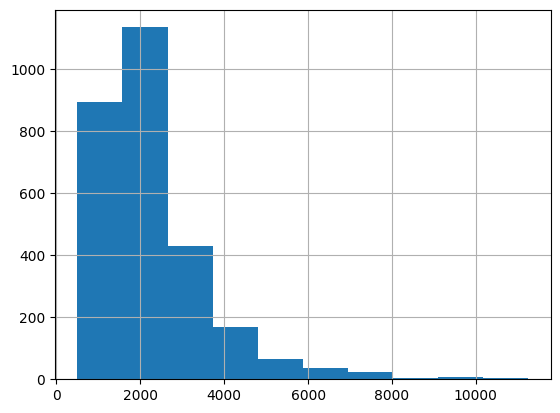

In [67]:
#Plotando um histograma para a coluna aluguel
base.aluguel.hist()



<Axes: >

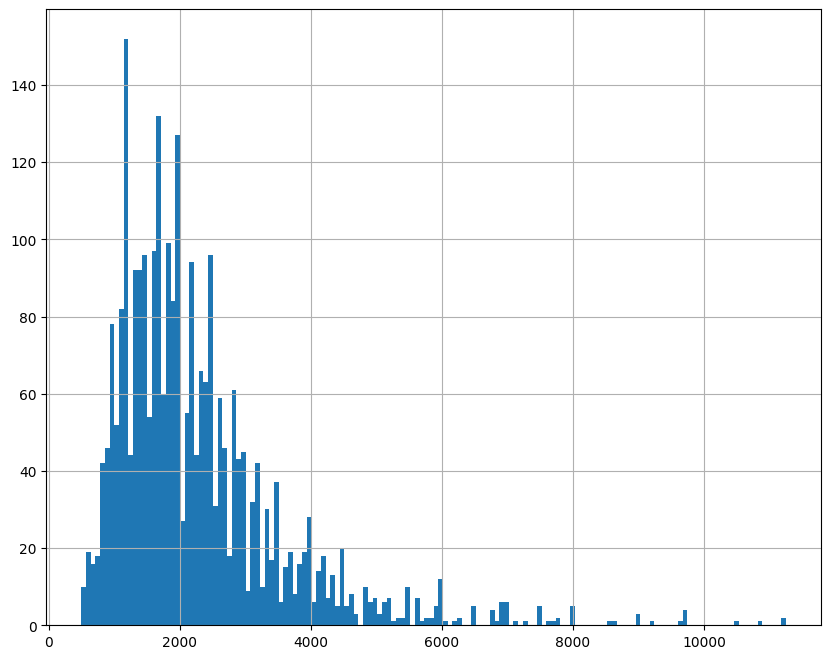

In [81]:
base.aluguel.hist(bins=150, figsize=(10,8))

No histograma, o eixo horizontal (eixo x) representa os intervalos de preço de aluguel, enquanto o eixo vertical (eixo y) mostra quantos imóveis caem em cada faixa de preço.

A partir do histograma, podemos observar que a maioria dos aluguéis concentra-se em faixas de preço mais baixas, com uma diminuição gradual na frequência conforme o preço do aluguel aumenta.

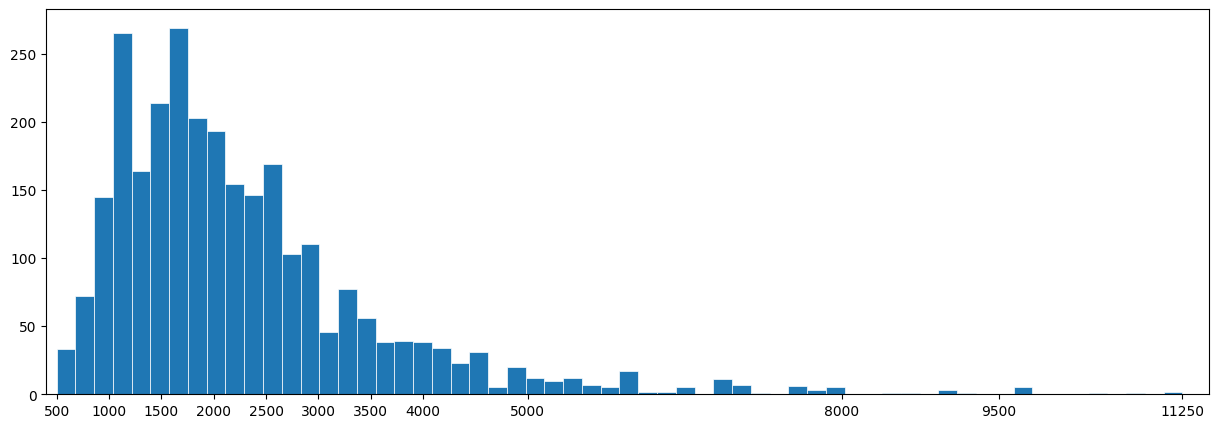

In [86]:


fig, ax = plt.subplots (figsize = (15, 5))
ax.hist(base.aluguel, bins=60, linewidth=0.5, edgecolor= "white")
ax.set(xlim=(400, 11500), xticks= [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 5000, 8000, 9500, 11250])
plt.show()

In [89]:
#Vamos ordenar os valores da coluna aluguel em ordem decrescente
base.sort_values('aluguel',ascending=False).head(10)


,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
235,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
2305,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
1581,Jardim Paulista,10870.0,2008.0,575.0,138.0,217.0,13810.0,190.0,3.0,4.0,1.0,1.0,1.0,0.0,1.0
762,Paraíso,10500.0,2425.0,42.0,134.0,210.0,13310.0,200.0,3.0,5.0,2.0,8.0,1.0,1.0,1.0
2723,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
1402,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
255,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
2311,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
1629,Jardim Paulista,9660.0,1300.0,333.0,123.0,193.0,11610.0,130.0,2.0,2.0,1.0,5.0,1.0,0.0,1.0
387,Itaim Bibi,9200.0,2380.0,694.0,117.0,184.0,12580.0,210.0,4.0,4.0,2.0,11.0,1.0,0.0,0.0


Podemos perceber porque é necessário um novo tratamento na base durante o processo da análise exploratória


Vamos tentar verificar linhas duplicadas

In [91]:
# Verificado se existem valores duplicadas na base
#base.duplicated().sum()
base[base.duplicated()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
77,Barra Funda,1060.0,287.0,0.0,14.0,21.0,1382.0,50.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0
176,Belém,1200.0,200.0,20.0,20.0,24.0,1464.0,30.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
250,Belém,1200.0,200.0,20.0,20.0,24.0,1464.0,30.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
267,Paraíso,3400.0,1372.0,360.0,44.0,68.0,5244.0,147.0,3.0,3.0,1.0,4.0,1.0,0.0,1.0
306,Perdizes,2150.0,0.0,0.0,28.0,43.0,2221.0,72.0,1.0,2.0,0.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,Vila Nova Conceição,3090.0,900.0,184.0,40.0,61.0,4275.0,85.0,2.0,2.0,1.0,12.0,1.0,0.0,0.0
2770,Aclimação,2200.0,0.0,72.0,37.0,44.0,2353.0,90.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0
2771,Santa Cecília,1120.0,280.0,0.0,15.0,22.0,1437.0,32.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0
2773,Aclimação,1100.0,308.0,16.0,14.0,22.0,1460.0,30.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>bairro</th>
      <th>aluguel</th>
      <th>condominio</th>
      <th>iptu</th>
      <th>seguro_incendio</th>
      <th>taxa_serviço</th>
      <th>total</th>
      <th>metragem</th>
      <th>quarto</th>
      <th>banheiro</th>
      <th>vaga_carro</th>
      <th>andar</th>
      <th>aceita_pet</th>
      <th>mobilia</th>
      <th>metro_prox</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>77</th>
      <td>Barra Funda</td>
      <td>1060.0</td>
      <td>287.0</td>
      <td>0.0</td>
      <td>14.0</td>
      <td>21.0</td>
      <td>1382.0</td>
      <td>50.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>2.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>176</th>
      <td>Belém</td>
      <td>1200.0</td>
      <td>200.0</td>
      <td>20.0</td>
      <td>20.0</td>
      <td>24.0</td>
      <td>1464.0</td>
      <td>30.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>250</th>
      <td>Belém</td>
      <td>1200.0</td>
      <td>200.0</td>
      <td>20.0</td>
      <td>20.0</td>
      <td>24.0</td>
      <td>1464.0</td>
      <td>30.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>267</th>
      <td>Paraíso</td>
      <td>3400.0</td>
      <td>1372.0</td>
      <td>360.0</td>
      <td>44.0</td>
      <td>68.0</td>
      <td>5244.0</td>
      <td>147.0</td>
      <td>3.0</td>
      <td>3.0</td>
      <td>1.0</td>
      <td>4.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>306</th>
      <td>Perdizes</td>
      <td>2150.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>28.0</td>
      <td>43.0</td>
      <td>2221.0</td>
      <td>72.0</td>
      <td>1.0</td>
      <td>2.0</td>
      <td>0.0</td>
      <td>3.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>2767</th>
      <td>Vila Nova Conceição</td>
      <td>3090.0</td>
      <td>900.0</td>
      <td>184.0</td>
      <td>40.0</td>
      <td>61.0</td>
      <td>4275.0</td>
      <td>85.0</td>
      <td>2.0</td>
      <td>2.0</td>
      <td>1.0</td>
      <td>12.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th>2770</th>
      <td>Aclimação</td>
      <td>2200.0</td>
      <td>0.0</td>
      <td>72.0</td>
      <td>37.0</td>
      <td>44.0</td>
      <td>2353.0</td>
      <td>90.0</td>
      <td>2.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2771</th>
      <td>Santa Cecília</td>
      <td>1120.0</td>
      <td>280.0</td>
      <td>0.0</td>
      <td>15.0</td>
      <td>22.0</td>
      <td>1437.0</td>
      <td>32.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>7.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2773</th>
      <td>Aclimação</td>
      <td>1100.0</td>
      <td>308.0</td>
      <td>16.0</td>
      <td>14.0</td>
      <td>22.0</td>
      <td>1460.0</td>
      <td>30.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>7.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>2774</th>
      <td>Jardim Paulista</td>
      <td>4182.0</td>
      <td>887.0</td>
      <td>302.0</td>
      <td>53.0</td>
      <td>83.0</td>
      <td>5507.0</td>
      <td>130.0</td>
      <td>2.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>5.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>1.0</td>
    </tr>
  </tbody>
</table>
<p>650 rows × 15 columns</p>
</div>


Temos 650 valores duplicados, isso é muito. Então vamos eliminar esses valores

In [93]:
#Excluindo as linhas duplicadas
base.drop_duplicates(inplace=True)

base[base.duplicated()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox


Existe alguma relação entre Alguer e Metragem?

Vamos visualizar num gráfico a relação entre as duas

<Axes: xlabel='aluguel', ylabel='metragem'>

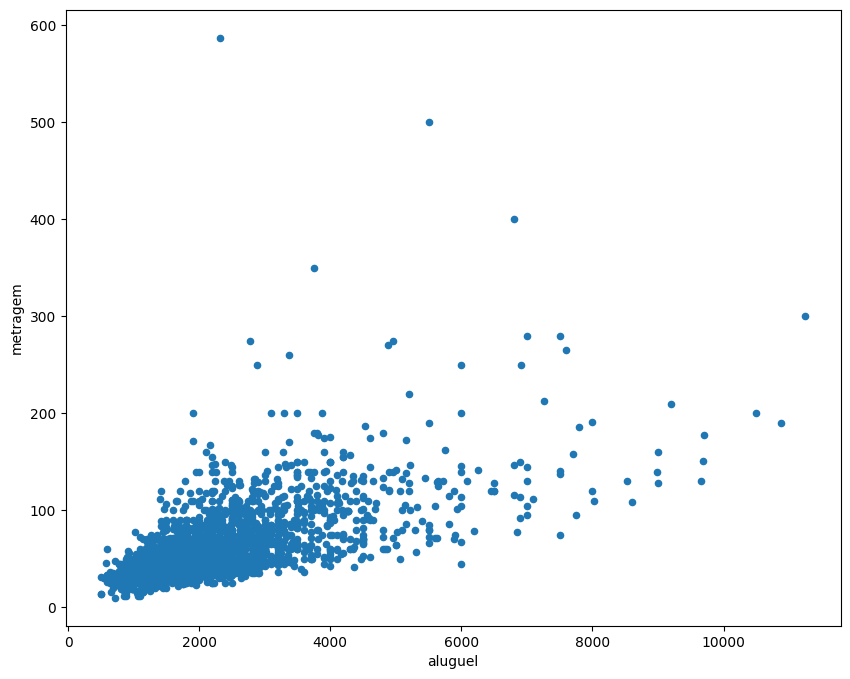

In [94]:
#visualizar num gráfico (plot.scatter) a relação entre as colunas aluguel e metragem
base.plot.scatter(x='aluguel', y='metragem', figsize=(10,8))

Quanto menor a metragem menor é o preço do aluguer.

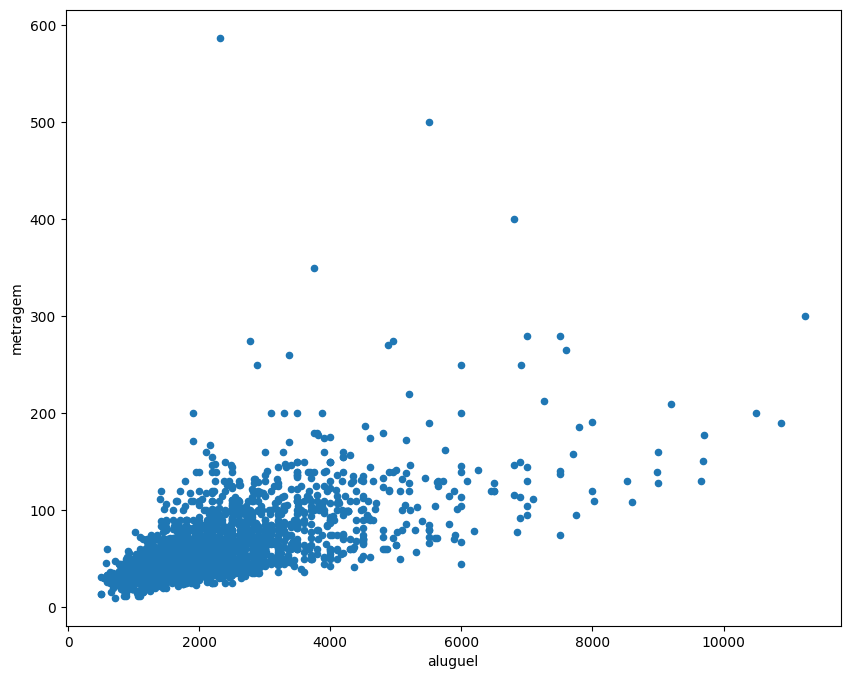

## Seaborn
<p>É uma biblioteca de visualização de dados em Python baseada no Matplotlib.</p> 
<p>Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos. </p>
<p>É especialmente útil para explorar e entender dados através de visualizações que podem revelar padrões e insights</p>

C:\Users\Elvis\AppData\Local\Temp\ipykernel_3288\3429461776.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot (x='metro_prox', y='aluguel', data=base, orient='v', width=0.5, palette='colorblind')


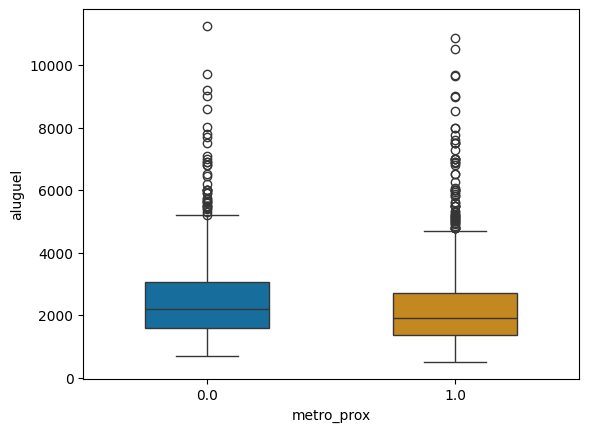

In [114]:
#visualizar num gráfico (plot.scatter) a relação entre as colunas aluguel e metrmetro_proxagem
#base.plot.scatter(x='aluguel', y='metragem', figsize=(10,8), xlim=(0, 10000), ylim=(0, 200))
#base.sns.boxplot (x='aluguel', y='metragem', data=base) 

sns.boxplot (x='metro_prox', y='aluguel', data=base, orient='v', width=0.5, palette='colorblind')
plt.show()

Que tal fazermos uma relação entre o bairro e o aluguel, para vermos se tem bairros em que o alguer se torna muito caro

<Axes: xlabel='aluguel', ylabel='bairro'>

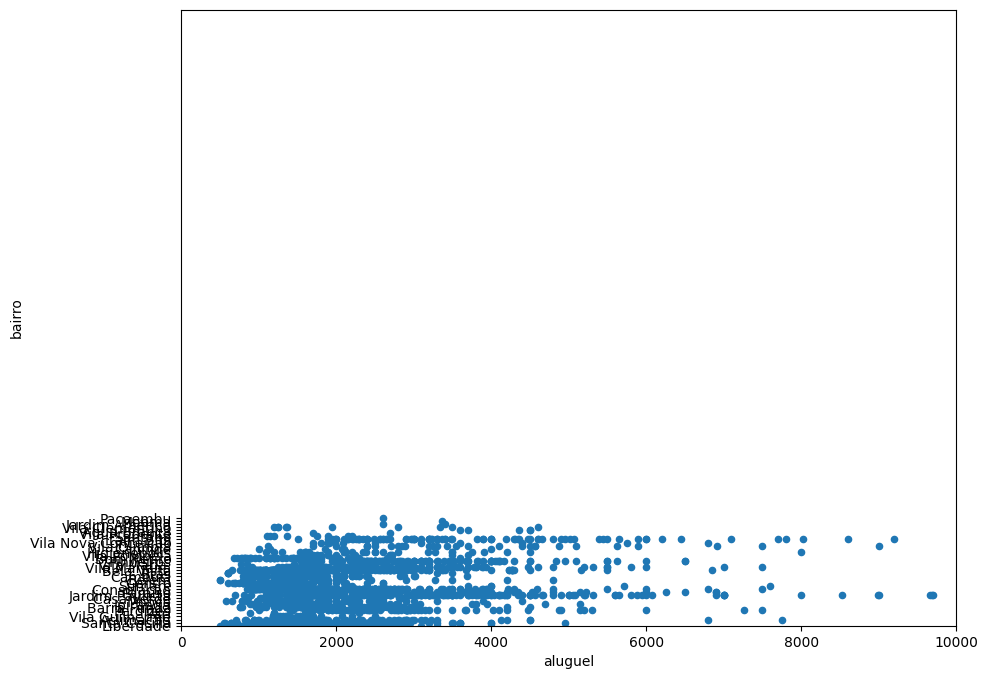

In [115]:
#visualizar num gráfico (plot.scatter) a relação entre as colunas aluguel e bairro
base.plot.scatter(x='aluguel', y='bairro', figsize=(10,8), xlim=(0, 10000), ylim=(0, 200))
